<a href="https://colab.research.google.com/github/MaryamS5/Machine_learning/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install scikit-learn==0.23.1
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scipy
!pip install matplotlib
%matplotlib inline


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
heart = pd.read_csv("/content/drive/MyDrive/assigment 2/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140.0,221,0,1,164.0,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141.0,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118.0,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159.0,0,0.0,2,0,2,1
1024,54,1,0,120.0,188,0,1,113.0,0,1.4,1,1,3,0


In [ ]:
heart.info()

heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1024 non-null   float64
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1024.000000,1025.00000,1025.000000,1025.000000,1024.000000,1025.000000,1024.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611328,246.00000,0.149268,0.529756,149.140625,0.336585,1.069629,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.525273,51.59251,0.356527,0.527878,23.001333,0.472772,1.174079,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.median()

,0
age,56.0
sex,1.0
cp,1.0
trestbps,130.0
chol,240.0
fbs,0.0
restecg,1.0
thalach,152.0
exang,0.0
oldpeak,0.8


In [ ]:
heart.shape

(1025, 14)

In [ ]:
heart.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [ ]:

# Drop duplicates
heart = heart.drop_duplicates()
heart.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
723,False
733,False
739,False
843,False


In [ ]:
# Check for missing values
missing_values = heart.isnull().sum()  # Count missing values for each column
print("Missing values:\n", missing_values)

Missing values:
 age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Replace '?' with NaN
heart.replace('?', np.nan, inplace=True) # Replace all occurrences of '?' with NaN

# Check for missing values
missing_values = heart.isnull().sum()  # Count missing values for each column
print("Missing values:\n", missing_values)

Missing values:
 age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
heart.dropna(inplace=True)

# Check for missing values
missing_values = heart.isnull().sum()  # Count missing values for each column
print("Missing values:\n", missing_values)

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = heart.drop('age', axis=1)  # Independent variables
y = heart['age']                # Dependent variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler
# Scale features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

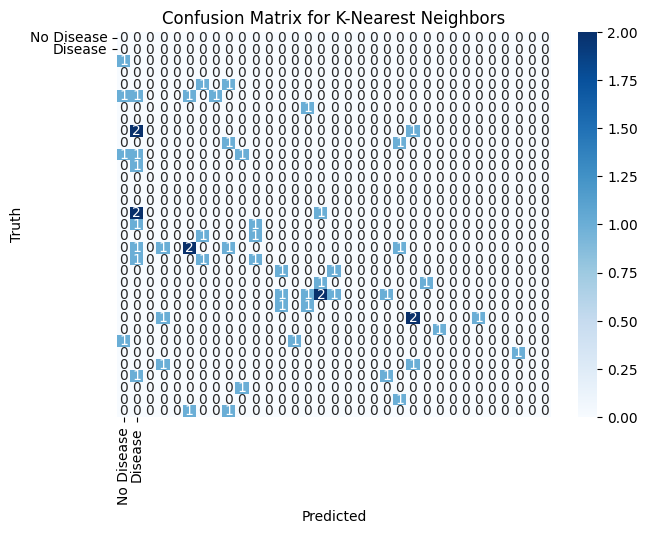

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         2
          41       0.25      0.25      0.25         4
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         3
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         0
          51       0.25      0.33      0.29         3
          52       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Generate confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrix for KNN
plt.figure(figsize=(7, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

# Print classification report for KNN
print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))